In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [189]:
import gp_regression as gp
import importlib
importlib.reload(gp)
import numpy as np

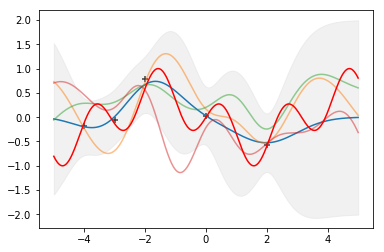

In [190]:
# Initialize GP object with kernel function
kgp = gp.KernelGP(gp.sqe)

def target(x):
    return np.sin(x) * np.cos(2*x)

# Noise on observations
sigma = 0.1

# Input x and y values to condition on
xobs = np.array([-4, -3, -2, 0,  2])
yobs = target(xobs) + np.random.randn(xobs.size) * sigma
kgp.observe(xobs, yobs, sigma)

# Predict values at these points
x = np.linspace(-5, 5, 400)
predm, predv = kgp.predict(x)

def plot_rtn():
    # Plot results, grey area is 95% confidence zone
    plt.scatter(xobs, yobs, marker='+', color='black')
    plt.plot(x, predm)
    ub = predm + 2 * np.sqrt(np.diag(predv)).T
    lb = predm - 2 * np.sqrt(np.diag(predv)).T
    plt.fill_between(x, lb, ub, color='lightgray', alpha=.3)
    plt.plot(x, np.random.multivariate_normal(predm, predv, size=3).T, alpha=.5);
    plt.plot(x, target(x), color='red')
    plt.show()
    
plot_rtn()



Observed 4.223058


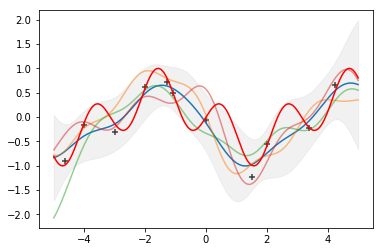

In [188]:
# Sample high-var locations & observe target values
# Update GP with new observations

impt = np.diag(predv)
xupd = np.random.choice(x, p=np.diag(predv) / np.sum(np.diag(predv)))
print("Observed %f" %xupd)
yupd = target(xupd) + np.random.randn() * sigma
xobs = np.append(xobs, xupd)
yobs = np.append(yobs, yupd)
kgp.observe(xobs, yobs, sigma)

predm, predv = kgp.predict(x)
plot_rtn()
